<a href="https://colab.research.google.com/github/Vaycold/tensorflow_tutorial/blob/main/%232.%EA%B8%B0%EB%B3%B8%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.5.0


In [7]:
# Fashion MNIST

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [8]:
type(train_images)

numpy.ndarray

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preprocessing

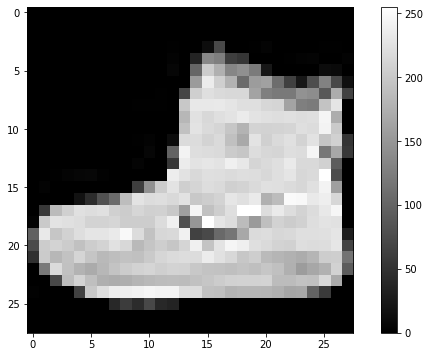

In [15]:
plt.figure(figsize=(10,6))
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
train_images[0].max()

255

In [17]:
train_images = train_images / 255
test_images = test_images / 255

In [18]:
print(train_images.max(), test_images.max())

1.0 1.0


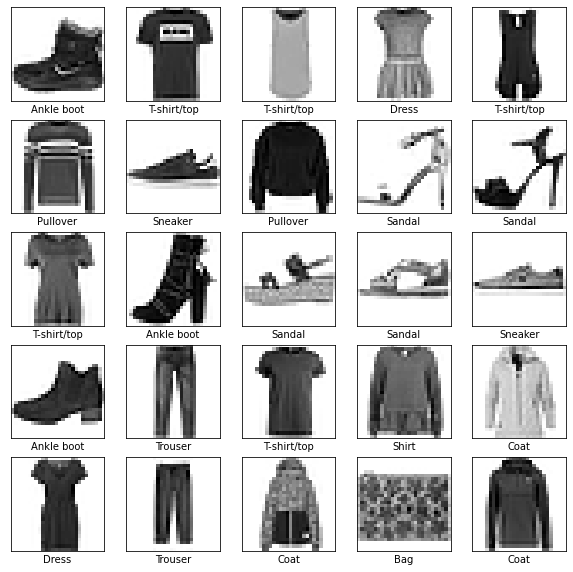

In [20]:
plt.figure(figsize=(10,10))
for i in range(25) :
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()


In [21]:
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)), #28x28 -> 784의 1차원 배열로 만듦 / 가중치는 없으며 변환하는 역할 수행
            keras.layers.Dense(128, activation='relu'),
            keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [24]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4907 - accuracy: 0.8275
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3729 - accuracy: 0.8662
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3352 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3118 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2946 - accuracy: 0.8918


In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\n 테스트 정확도 : ', test_acc)

313/313 - 0s - loss: 0.3703 - accuracy: 0.8660

 테스트 정확도 :  0.8659999966621399


In [26]:
prediction = model.predict(test_images)
prediction.shape

(10000, 10)

In [27]:
prediction[0]

array([4.7149133e-06, 8.5863192e-08, 3.0953299e-07, 4.8802008e-07,
       2.1115987e-07, 3.1222117e-03, 7.7153118e-06, 7.3220190e-03,
       7.5041309e-05, 9.8946720e-01], dtype=float32)

In [28]:
prediction[0].argmax()

9

In [29]:
test_labels[0]

9

In [30]:
def plot_images(i, prediction, true_label, img) :
    prediction, true_label, img = prediction[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap = 'gray')

    predicted_label = np.argmax(prediction)

    # 예측이 맞을 경우 파랑
    if predicted_label == true_label :
        color = 'blue' 

    # 아니면 빨강
    else :
        color = 'red'

    plt.xlabel('{} {:2.0f}% ({})'.format(
        class_names[predicted_label],
        100*np.max(prediction),
        class_names[true_label]),
        color = color)

In [33]:
def plot_value_array(i, prediction, true_label) :
    prediction = prediction[i]
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(10), prediction, color = '#777777')
    plt.ylim([0,1])
    
    predicted_label = np.argmax(prediction)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

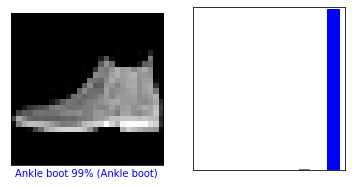

In [34]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i,prediction, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction, test_labels)
plt.show()

In [41]:
def auto(i) :
    
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plot_images(i,prediction, test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, prediction, test_labels)
    plt.show()

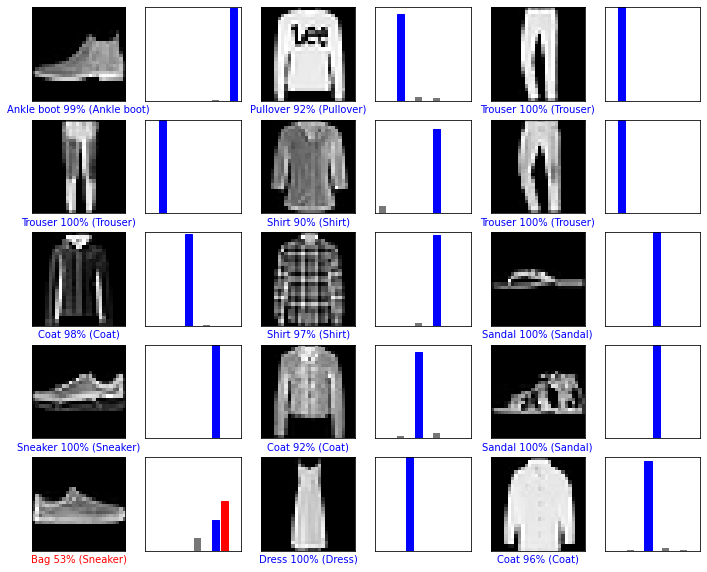

In [46]:
num_rows, num_cols = 5,3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images) :
    plt.subplot(num_rows, 2*num_cols, 2*i + 1 )
    plot_images(i, prediction, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i + 2 )
    plot_value_array(i, prediction, test_labels)
plt.show()


In [47]:
img = test_images[0]

In [53]:
# 차원 수 늘리기
img = np.expand_dims(img,0)
print(img.shape)

(1, 28, 28)


In [54]:
prediction_single = model.predict(img)
print(prediction_single)

[[4.7149224e-06 8.5863675e-08 3.0953331e-07 4.8802144e-07 2.1116027e-07
  3.1222177e-03 7.7153345e-06 7.3220399e-03 7.5041447e-05 9.8946720e-01]]


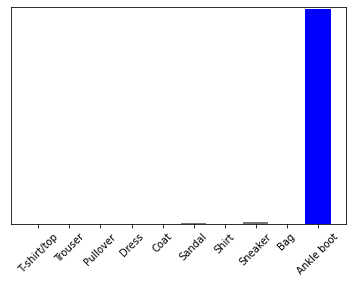

In [56]:
plot_value_array(0, prediction_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [57]:
np.argmax(prediction_single)

9